# Gibbs Sampler para los modelos hard-core y q-coloring


Autores: 
- Daniel Alejandro García Hernández
- David Camilo Cortes Salazar

En este notebook se encuentra una implementación del Gibbs Sampler para Hard-core y q-colorings. 

Las librerías necesarias para ejectuar el código son:

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

---
# Punto 3 - Gibbs Sampler para las q-coloraciones (q-colorings)

Iniciamos definiendo algunas funciones que ya habían sido usadas en el programa anterior.


Acto seguido, creamos la grilla del módelo. Para esto, usamos un grafo cuadrado 2D de NetworkX con colores que siguen una diagonal, asegurando así que el estado inicial es una q-coloración válida. 


Este grafo recibe de input las dimensiones $k$ del grafo, y el número $q$ de colores. Se tiene las condiciones:

- $3\leq k \leq 20$,
- $2\leq q \leq 10$.

Los colores ya se encuentran en el código, por lo que no es necesario que el usuario los ingrese.

In [10]:
def restart_G(k, q, colors_list):
    # Create a lattice, kxk graph
    G = nx.grid_2d_graph(k, k)

    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    # Color of the nodes
    
    #color_values = {node: colors_list[((i+ (i//k)*(k+1%2)) % 2)] for i, node in enumerate(G.nodes())}
    color_values = {node: colors_list[(i + i//k - (i//k)*k)%q] for i, node in enumerate(G.nodes())}
    
    return G, color_values


    
def plot_grid(color_values):
    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    ## Plot the graph
    options = {
        "font_size": 200,
        "node_size": int(30000/k**2),
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1.7,
        "width": 1.7,
        "with_labels": False,
        "node_color": color_values.values(),
    }

    plt.figure(figsize=(5 + 0.1*k, 5 + 0.1*k))
    nx.draw_networkx(G, pos=pos, **options)
    plt.tight_layout()
    plt.show()
    

    
def find_vecinos_dict():
    # Optimizacion. 
    # Ignorando el color, el grafo es constante, por lo que la lsita de vecinos tambien 
    vecinos = {}

    for x in range (0, k):
        for y in range (0, k):
            vecinos[(x, y)] = G.neighbors((x,y))
    
    return vecinos


    
def find_valid_colors(color_values, x, y):
    colores_vecinos = set()
    
#    for vecino in vecinos[(x,y)]:
    for vecino in G.neighbors((x,y)):
        colores_vecinos.add(color_values[vecino])
    
    valid_colors = list(set(colors_list) - colores_vecinos)
    
    return valid_colors    
    
    
    
def random_step():
    # Elegir un nodo al azar con distribución uniforme https://docs.python.org/3/library/random.html
    x = random.choice(range(0,k))
    y = random.choice(range(0,k))
      
    valid_colors = find_valid_colors(color_values, x, y)
    new_color = random.choice(valid_colors)
    color_values[(x,y)] = new_color
    

    
def find_random_evolution(n):
    for _ in range(n): random_step()
        
        

def systematic_step(x,y):
    valid_colors = find_valid_colors(color_values, x, y)
    new_color = random.choice(valid_colors)
    color_values[(x,y)] = new_color
    

    
def find_systematic_evolution(n):
    for ii in range(n): 
        x = ii % k
        y = (ii//k) % k
        systematic_step(x,y)
    

In [211]:
color_values[vecino]

'blue'

In [9]:
list(vecinos[(0,1)])


[]

In [236]:
for vecino in vecinos[(0,0)]:
    print("xd")
    print(vecino)
    print(color_values[vecino])

In [178]:
colores_vecinos = set()

for vecino in vecinos[(0,0)]:
    colores_vecinos.add(color_values[vecino])

valid_colors = list(set(colors_list) - colores_vecinos)

valid_colors

#find_systematic_evolution(1)
#plot_grid(color_values)

['red', 'blue']

Ahora, definimos los inputs del programa

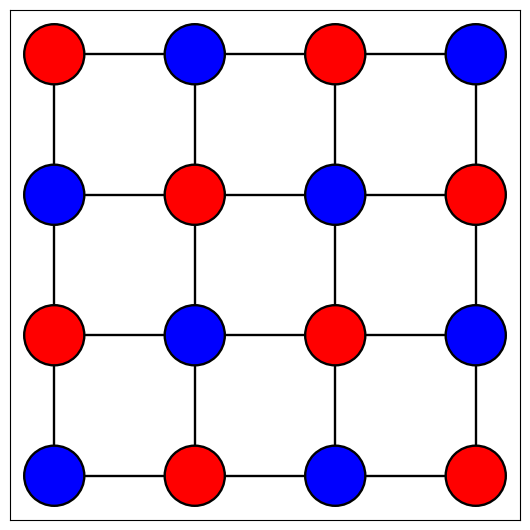

In [11]:
## Inputs del programa    
k = 4
q = 2



## Lista de colores preestablecidos. Se usaran los primeros q
colors_list = ["red", "blue", "green", "orange", "grey", "purple", \
               "black", "magenta", "white", "cyan"]


# Iniciar el valor de los colores
colors_list = colors_list[:q:]
G, color_values = restart_G(k, q, colors_list)
vecinos = find_vecinos_dict()


# Graficar la grilla
plot_grid(color_values)

Creamos una lista con varias configuraciones de q-coloraciones válidas:

In [12]:
n_dist = 100
n_steps = 10000

samples = []

for _ in range (n_dist):
    G, color_values = restart_G(k, q, colors_list)
    find_systematic_evolution(n_steps)
    samples.append(color_values)

Hallamos la probabilidad de que los nodos de cada vínculo tengan colores diferentes. Es decir:

$\rho_{G_{j-1}} = P(X(x_j) \neq X(y_j))$

In [14]:
for edge in edges:
    node1, node2 = edge[0], edge[1]
    print(sample[node1])

NameError: name 'edges' is not defined

In [15]:
edges = G.edges()
probabilities = dict.fromkeys(edges, 0) # P. de que los dos nodos de un edge tengan color diferente


for sample in samples:
    for edge in edges:
        node1, node2 = edge[0], edge[1]

        if (sample[node1] != sample[node2]):
            probabilities[edge] += 1
    
for edge in edges:
    probabilities[edge] /= n_dist
    
probabilities.values()

dict_values([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [63]:
probabilities.values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [38]:
def boolean():
    ans = 0
    if True:
        ans+=1
        
def inter():
    ans = 0
    ans += int(True)
    


35 ns ± 0.314 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [40]:
%timeit boolean()

35.4 ns ± 0.961 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [41]:
%timeit inter()

62.1 ns ± 1.13 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [35]:
%load_ext heat

---
Profiling del código sin optimizaciones:

/home/danjaro/.local/lib/python3.11/site-packages/pyheat/pyheat.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_yticklabels(row_labels, minor=False)


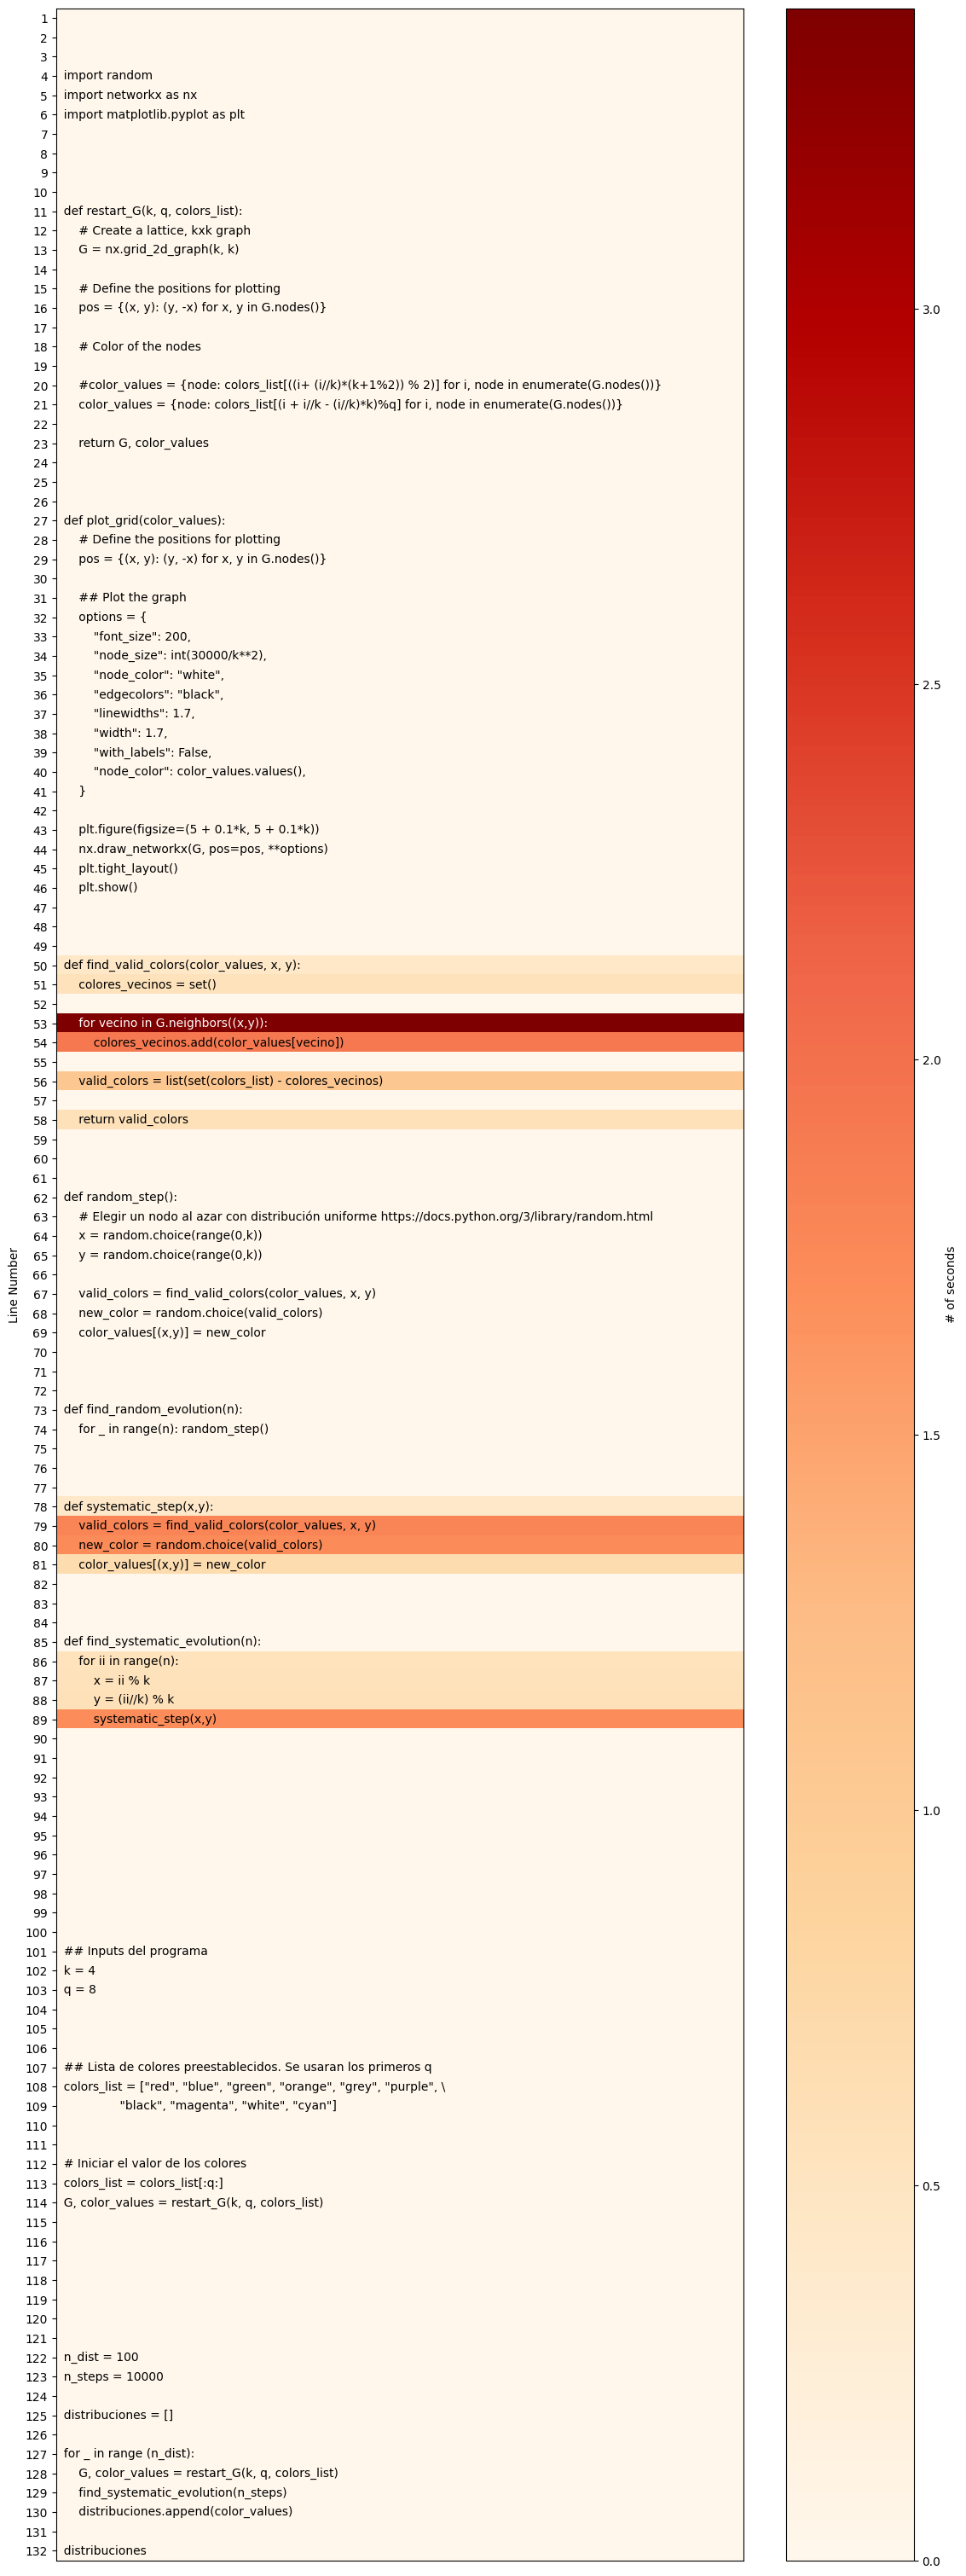

In [8]:
%%heat
### Codigo sin optimizar


import random
import networkx as nx
import matplotlib.pyplot as plt




def restart_G(k, q, colors_list):
    # Create a lattice, kxk graph
    G = nx.grid_2d_graph(k, k)

    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    # Color of the nodes
    
    #color_values = {node: colors_list[((i+ (i//k)*(k+1%2)) % 2)] for i, node in enumerate(G.nodes())}
    color_values = {node: colors_list[(i + i//k - (i//k)*k)%q] for i, node in enumerate(G.nodes())}
    
    return G, color_values


    
def plot_grid(color_values):
    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    ## Plot the graph
    options = {
        "font_size": 200,
        "node_size": int(30000/k**2),
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1.7,
        "width": 1.7,
        "with_labels": False,
        "node_color": color_values.values(),
    }

    plt.figure(figsize=(5 + 0.1*k, 5 + 0.1*k))
    nx.draw_networkx(G, pos=pos, **options)
    plt.tight_layout()
    plt.show()
    
    
    
def find_valid_colors(color_values, x, y):
    colores_vecinos = set()
    
    for vecino in G.neighbors((x,y)):
        colores_vecinos.add(color_values[vecino])
    
    valid_colors = list(set(colors_list) - colores_vecinos)
    
    return valid_colors    
    
    
    
def random_step():
    # Elegir un nodo al azar con distribución uniforme https://docs.python.org/3/library/random.html
    x = random.choice(range(0,k))
    y = random.choice(range(0,k))
      
    valid_colors = find_valid_colors(color_values, x, y)
    new_color = random.choice(valid_colors)
    color_values[(x,y)] = new_color
    

    
def find_random_evolution(n):
    for _ in range(n): random_step()
        
        

def systematic_step(x,y):
    valid_colors = find_valid_colors(color_values, x, y)
    new_color = random.choice(valid_colors)
    color_values[(x,y)] = new_color
    

    
def find_systematic_evolution(n):
    for ii in range(n): 
        x = ii % k
        y = (ii//k) % k
        systematic_step(x,y)
    


    
    
    
    
    
    
    
    
## Inputs del programa    
k = 4
q = 8



## Lista de colores preestablecidos. Se usaran los primeros q
colors_list = ["red", "blue", "green", "orange", "grey", "purple", \
               "black", "magenta", "white", "cyan"]


# Iniciar el valor de los colores
colors_list = colors_list[:q:]
G, color_values = restart_G(k, q, colors_list)







n_dist = 100
n_steps = 10000

distribuciones = []

for _ in range (n_dist):
    G, color_values = restart_G(k, q, colors_list)
    find_systematic_evolution(n_steps)
    distribuciones.append(color_values)
    
distribuciones

/home/danjaro/.local/lib/python3.11/site-packages/pyheat/pyheat.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_yticklabels(row_labels, minor=False)


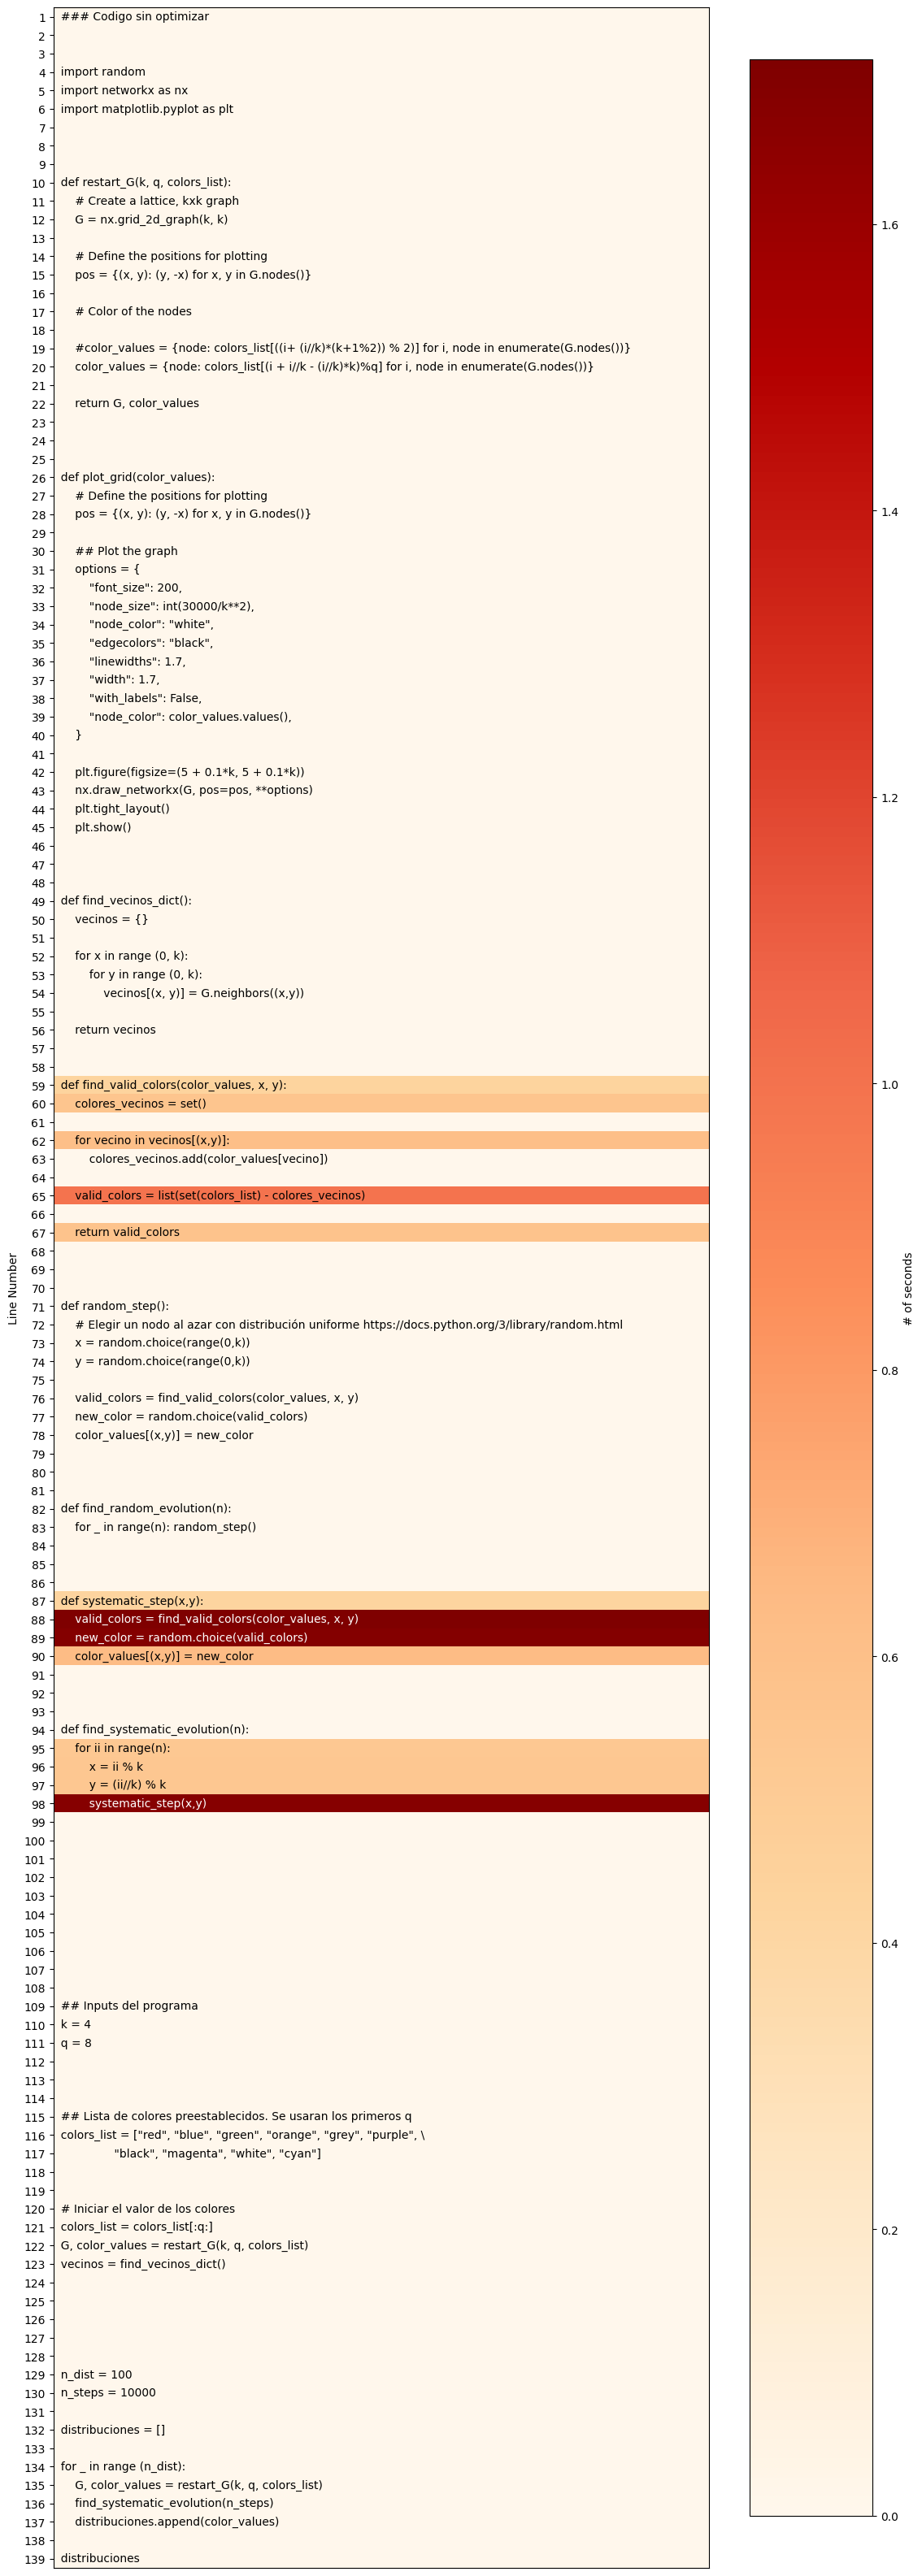

In [16]:
%%heat
### Codigo sin optimizar


import random
import networkx as nx
import matplotlib.pyplot as plt



def restart_G(k, q, colors_list):
    # Create a lattice, kxk graph
    G = nx.grid_2d_graph(k, k)

    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    # Color of the nodes
    
    #color_values = {node: colors_list[((i+ (i//k)*(k+1%2)) % 2)] for i, node in enumerate(G.nodes())}
    color_values = {node: colors_list[(i + i//k - (i//k)*k)%q] for i, node in enumerate(G.nodes())}
    
    return G, color_values


    
def plot_grid(color_values):
    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    ## Plot the graph
    options = {
        "font_size": 200,
        "node_size": int(30000/k**2),
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1.7,
        "width": 1.7,
        "with_labels": False,
        "node_color": color_values.values(),
    }

    plt.figure(figsize=(5 + 0.1*k, 5 + 0.1*k))
    nx.draw_networkx(G, pos=pos, **options)
    plt.tight_layout()
    plt.show()
    

    
def find_vecinos_dict():
    vecinos = {}

    for x in range (0, k):
        for y in range (0, k):
            vecinos[(x, y)] = G.neighbors((x,y))
    
    return vecinos

    
def find_valid_colors(color_values, x, y):
    colores_vecinos = set()
    
    for vecino in vecinos[(x,y)]:
        colores_vecinos.add(color_values[vecino])
    
    valid_colors = list(set(colors_list) - colores_vecinos)
    
    return valid_colors    
    
    
    
def random_step():
    # Elegir un nodo al azar con distribución uniforme https://docs.python.org/3/library/random.html
    x = random.choice(range(0,k))
    y = random.choice(range(0,k))
      
    valid_colors = find_valid_colors(color_values, x, y)
    new_color = random.choice(valid_colors)
    color_values[(x,y)] = new_color
    

    
def find_random_evolution(n):
    for _ in range(n): random_step()
        
        

def systematic_step(x,y):
    valid_colors = find_valid_colors(color_values, x, y)
    new_color = random.choice(valid_colors)
    color_values[(x,y)] = new_color
    

    
def find_systematic_evolution(n):
    for ii in range(n): 
        x = ii % k
        y = (ii//k) % k
        systematic_step(x,y)
    

    
    
    
    
    
    
    
    
## Inputs del programa    
k = 4
q = 8



## Lista de colores preestablecidos. Se usaran los primeros q
colors_list = ["red", "blue", "green", "orange", "grey", "purple", \
               "black", "magenta", "white", "cyan"]


# Iniciar el valor de los colores
colors_list = colors_list[:q:]
G, color_values = restart_G(k, q, colors_list)
vecinos = find_vecinos_dict()





n_dist = 100
n_steps = 10000

distribuciones = []

for _ in range (n_dist):
    G, color_values = restart_G(k, q, colors_list)
    find_systematic_evolution(n_steps)
    distribuciones.append(color_values)
    
distribuciones